In [1]:
### 데이터 가져오기
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df= pd.read_csv("Python/Project/pdata/report4.csv", header=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1895 non-null   object 
 1   Year                              1895 non-null   int64  
 2   Life Ladder                       1895 non-null   float64
 3   Log GDP per capita                1895 non-null   float64
 4   Social support                    1895 non-null   float64
 5   Healthy life expectancy at birth  1895 non-null   float64
 6   Freedom to make life choices      1895 non-null   float64
 7   Generosity                        1895 non-null   float64
 8   Perceptions of corruption         1895 non-null   float64
 9   Depression                        1895 non-null   float64
 10  schooling                         1895 non-null   float64
 11  alcohol disorders                 1895 non-null   float64
 12  suicid

In [2]:
### VIF 

X = df[['Log GDP per capita','Social support','Healthy life expectancy at birth',\
         'Freedom to make life choices','Generosity','Perceptions of corruption', 'Depression',\
             'schooling','alcohol disorders','suicide rates','Obesity','Fertility', 'Life Ladder','Year']]
vif= pd.DataFrame()
vif["VIF Factor"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]= X.columns
vif.round(1)


,VIF Factor,features
0,462.1,Log GDP per capita
1,120.4,Social support
2,497.0,Healthy life expectancy at birth
3,50.7,Freedom to make life choices
4,1.4,Generosity
5,27.7,Perceptions of corruption
6,26.7,Depression
7,33.9,schooling
8,2.8,alcohol disorders
9,8.5,suicide rates


                                  Log GDP per capita  Social support  \
Log GDP per capita                          1.000000        0.678770   
Social support                              0.678770        1.000000   
Healthy life expectancy at birth            0.831651        0.615124   
Freedom to make life choices                0.350106        0.411389   
Generosity                                 -0.012169        0.058522   
Perceptions of corruption                  -0.358572       -0.221166   
Depression                                  0.438014        0.243277   
schooling                                   0.808610        0.630720   
alcohol disorders                           0.077492        0.220733   
suicide rates                               0.006132        0.115099   
Obesity                                     0.580417        0.403873   
Fertility                                  -0.781848       -0.554780   
Life Ladder                                 0.785514        0.70

<AxesSubplot:>

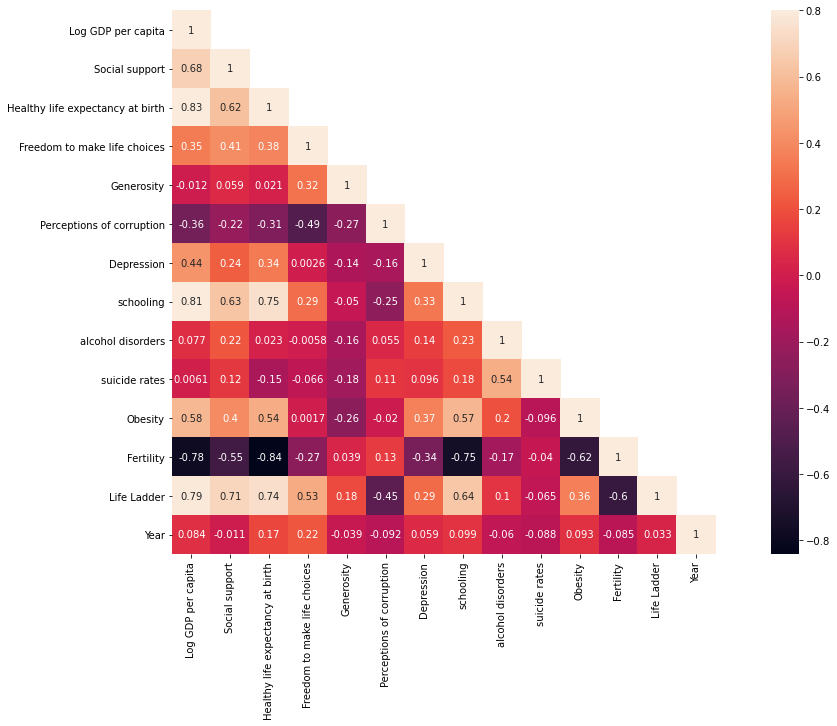

In [3]:
cm= df[['Log GDP per capita','Social support','Healthy life expectancy at birth',\
         'Freedom to make life choices','Generosity','Perceptions of corruption', 'Depression',\
             'schooling','alcohol disorders','suicide rates','Obesity','Fertility', 'Life Ladder','Year','Country']]
cm= cm.corr()
print(cm)
mask = np.array(cm)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, mask=mask,vmax=.8, square=True,annot=True)



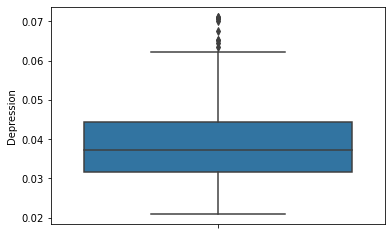

In [4]:
# 우울증 컬럼 막대그래프
sns.boxplot(y=df.Depression, data=df)
plt.show()


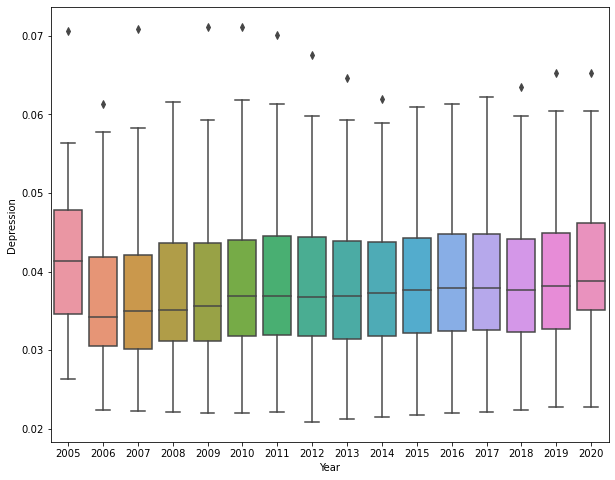

In [6]:
# 연도별 우울증 막대그래프
plt.figure(figsize=(10,8))
sns.boxplot(x= "Year", y=df.Depression, data=df)
plt.show()


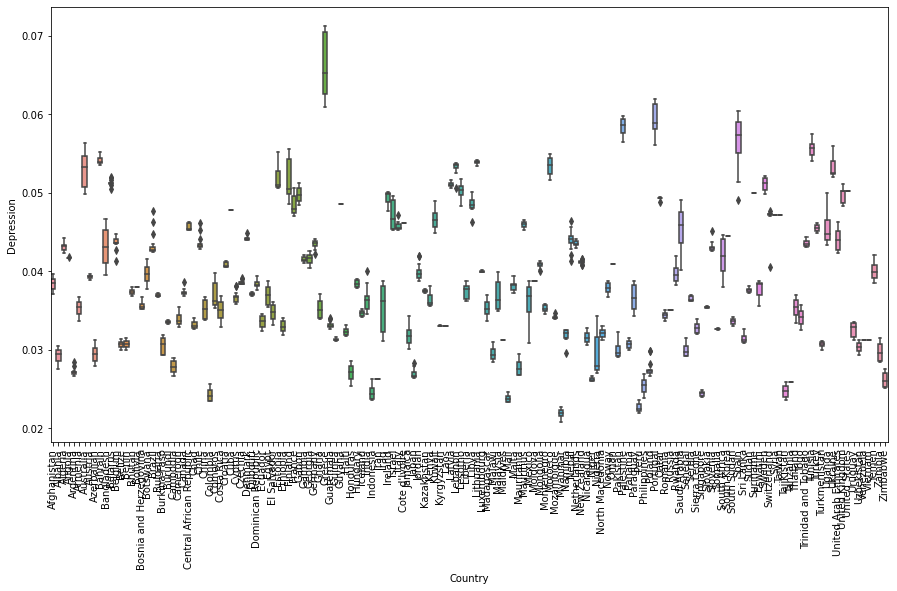

In [7]:
# 나라별 우울증 막대그래프
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
sns.boxplot(x= "Country", y=df.Depression, data=df)
plt.show()


In [8]:
# 이상치 개수 확인
def outlier_iqr(data, column): 
    global lower, upper    
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    iqr = q75 - q25    
    cut_off = iqr * 1.5          
    lower, upper = q25 - cut_off, q75 + cut_off     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    return print(column, '의 총 이상치 개수 :', data1.shape[0] + data2.shape[0])


outlier_iqr(df,'Depression')


Depression 의 총 이상치 개수 : 10


In [13]:
### 회귀분석

# 컬럼 이름 변경
df.rename(columns={"Life Ladder":"Happiness_Score", "Log GDP per capita":"Economy",
                  "Social support":"Society" , "Healthy life expectancy at birth":"Health",
                  "Freedom to make life choices":"Freedom",
                  "alcohol disorders":"Alcohol", "suicide rates":"Suicide", 
                  "Perceptions of corruption":"Corruption"}, inplace=True)

# 우울증 컬럼 추가. 정규화 전

from statsmodels.formula.api import ols
model = ols("Happiness_Score~ Economy + Society + Health + Freedom + Generosity+\
            +Corruption + Depression + schooling + Alcohol + Suicide + Obesity + Fertility", data=df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     511.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:19:52   Log-Likelihood:                -1537.4
No. Observations:                1895   AIC:                             3101.
Df Residuals:                    1882   BIC:                             3173.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0121      0.348    -11.520      0.000      -4.695      -3.329
Economy        0.4772      0.026     18.106      0.000       0.426       0.529
Society        2.3017      0.159     14.495      0.000       1.990       2.613
Health         0.0437      0.004     10.314      0.000       0.035       0.052
Freedom        0.9809      0.115      8.496      0.000       0.754       1.207
Generosity     0.6056      0.089      6.796      0.000       0.431       0.780
Corruption    -0.4472      0.086     -5.218      0.000      -0.615      -0.279
Depression    -0.6740      1.647     -0.409      0.682      -3.904       2.557
schooling     -0.0130      0.008     -1.635      0.102      -0.029       0.003
Alcohol        0.0329      0.004      7.879      0.000       0.025       0.041
Suicide       -0.0143      0.003     -4.689      0.000      -0.020      -0.008
Obesity       -0.0160      0.004     -4.146      0.000      -0.024      -0.008
Fertility      0.1156      0.021      5.628      0.000       0.075       0.156
==============================================================================
Omnibus:                       29.701   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.212
Skew:                          -0.175   Prob(JB):                     6.82e-10
Kurtosis:                       3.642   Cond. No.                     8.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""